In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import func1, func2, func3, func4, func5, func6, func7, \
                func12_, func3_, func4_, func3__, \
                monomial_poly, monomial_trig, monomial_poly_name, monomial_trig_name
from GSINDy import *

MSE = lambda x, y: ((x-y)**2).mean()


## Polynomial basis

In [2]:
from pysindy.feature_library import GeneralizedLibrary, PolynomialLibrary, CustomLibrary
from pysindy.optimizers import STLSQ
import pysindy as ps

functions = [lambda x,y: 1, \
        lambda x,y: x, lambda x,y: y, \
        lambda x,y: x**2, lambda x,y: x*y, lambda x,y: y**2, \
        lambda x,y: x**3, lambda x,y: x**2*y, lambda x,y: x*y**2, lambda x,y: y**3, \
        lambda x,y: x**4, lambda x,y: x**3*y, lambda x,y: x**2*y**2, lambda x,y: x*y**3, lambda x,y: y**4, \
        lambda x,y: x**5, lambda x,y: x**4*y, lambda x,y: x**3*y**2, lambda x,y: x**2*y**3, lambda x,y: x*y**4, lambda x,y: y**5]
names = [lambda x,y: '1', \
        lambda x,y: 'x', lambda x,y: 'y', \
        lambda x,y: 'x^2', lambda x,y: 'xy', lambda x,y: 'y^2', \
        lambda x,y: 'x^3', lambda x,y: 'x^2y', lambda x,y: 'xy^2', lambda x,y: 'y^3', \
        lambda x,y: 'x^4', lambda x,y: 'x^3y', lambda x,y: 'x^2y^2', lambda x,y: 'xy^3', lambda x,y: 'y^4', \
        lambda x,y: 'x^5', lambda x,y: 'x^4y', lambda x,y: 'x^3y^2', lambda x,y: 'x^2y^3', lambda x,y: 'xy^4', lambda x,y: 'y^5']
lib_custom = CustomLibrary(library_functions=functions, function_names=names)
lib_generalized = GeneralizedLibrary([lib_custom])

# 3 different variables: Hopf

Text(1, 0.8, "$y'=x + a*y + b*x^2y + c*y^3$")

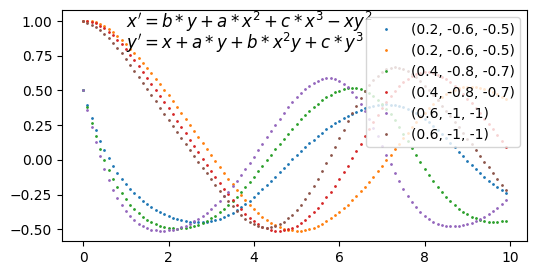

In [3]:
################### 3 variable ####################
alpha = .05
dt = .1      ## 2,3,6,8;     1,2,7,9
t = np.arange(0,10,dt)
x0 = [.5, 1]
a = [(.2, -.6, -.5), (.4, -.8, -.7), (.6, -1, -1)]
func = func3__
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=b*y + a*x^2 + c*x^3 - xy^2"
real1 = "y'=x + a*y + b*x^2y + c*y^3"
threshold_sindy=1e-2
threshold_similarity = 1e-2
threshold_tol = 1e-3
deriv_spline = True#False#


#### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(1, .95, f'${real0}$', fontsize=12)
ax.text(1, .8, f'${real1}$', fontsize=12)

In [4]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))


################### [SINDy] threshold: 0.001 ################
(x)' = 0.011 1 + -0.017 x + -0.598 y + -0.048 x^2 + -0.057 xy + -0.149 y^2 + -0.399 x^3 + 0.198 x^2y + -0.904 xy^2 + 0.087 y^3 + 1.079 x^4 + 0.366 x^3y + 1.403 x^2y^2 + 0.269 xy^3 + 0.410 y^4 + 0.113 x^5 + -1.351 x^4y + -0.319 x^3y^2 + -1.440 x^2y^3 + -0.233 xy^4 + -0.373 y^5
(y)' = 0.007 1 + 0.989 x + 0.202 y + -0.164 x^2 + -0.037 xy + -0.099 y^2 + 0.067 x^3 + -0.469 x^2y + 0.063 xy^2 + -0.443 y^3 + 0.714 x^4 + 0.242 x^3y + 0.928 x^2y^2 + 0.178 xy^3 + 0.271 y^4 + 0.075 x^5 + -0.894 x^4y + -0.210 x^3y^2 + -0.952 x^2y^3 + -0.154 xy^4 + -0.247 y^5
(x)' = -0.097 1 + -0.145 x + -0.876 y + 0.989 x^2 + 0.179 xy + 0.421 y^2 + -0.249 x^3 + 0.285 x^2y + -0.563 xy^2 + 0.185 y^3 + -0.925 x^4 + -0.995 x^3y + -1.412 x^2y^2 + -0.522 xy^3 + -0.393 y^4 + 0.493 x^5 + 0.486 x^4y + 0.815 x^3y^2 + 0.315 x^2y^3 + 0.172 xy^4 + -0.065 y^5
(y)' = -0.065 1 + 0.902 x + 0.349 y + 0.397 x^2 + 0.121 xy + 0.283 y^2 + 0.303 x^3 + -0.610 x^2y + 0.293 xy^2 

In [5]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')

    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=b*y + a*x^2 + c*x^3 - xy^2
feature 0 with different basis ['y' 'x^2' 'x^3']: 
 [[-0.600 0.200 -0.501 -0.999]
 [-0.800 0.400 -0.700 -0.999]
 [-1.000 0.600 -1.000 -0.999]] 
 ['y' 'x^2' 'x^3' 'xy^2']
real1: y'=x + a*y + b*x^2y + c*y^3
feature 1 with different basis ['y' 'x^2y' 'y^3']: 
 [[1.000 0.200 -0.599 -0.500]
 [1.000 0.400 -0.798 -0.700]
 [1.000 0.599 -0.996 -0.999]] 
 ['x' 'y' 'x^2y' 'y^3']
trajectory 0 MSE loss: 1.3488030197686814e-08
trajectory 1 MSE loss: 4.567443169143668e-08
trajectory 2 MSE loss: 3.4178103330857227e-07
Mean of each trajecctory loss: 1.3364783173256526e-07
################### [GSINDy] threshold: 0.005 ################
**************************************************
real0: x'=b*y + a*x^2 + c*x^3 - xy^2
feature 0 with different basis ['y' 'x^2' 'x^3']: 
 [[-0.600 0.200 -0.501 -0.999]
 [-0.800 0.400 -0.700 -0.999]
 [-1.000 0.600 -1.000 -0

# 2 different variables: fun12_

Text(0.1, 1.4, "$y'=-y$")

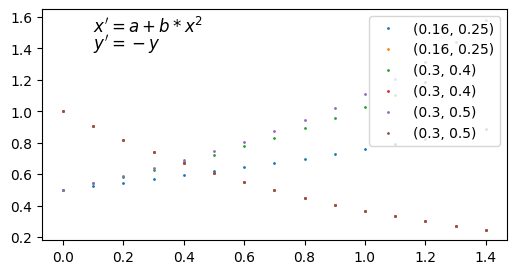

In [6]:
alpha = .05
dt = .1   ## 0,3
t = np.arange(0,1.5,dt)
x0 = [.5, 1]
a = [(.16, .25), (.3, .4), (.3, .5)]
func = func12_
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=a + b*x^2"
real1 = "y'=-y"
threshold_sindy=7e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(.1, 1.5, f'${real0}$', fontsize=12)
ax.text(.1, 1.4, f'${real1}$', fontsize=12)

In [7]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))


################### [SINDy] threshold: 0.001 ################
(x)' = -5845.521 1 + 2446.800 x + -9844.717 y + 15427.870 x^2 + 24525.754 xy + 15246.561 y^2 + -19855.384 x^3 + 6340.518 x^2y + -10469.332 xy^2 + -39.388 y^3 + 11088.746 x^4 + -15370.318 x^3y + -8567.381 x^2y^2 + -17318.164 xy^3 + -1765.725 y^4 + -2264.611 x^5 + -9836.893 x^4y + -74.454 x^3y^2 + 2223.706 x^2y^3 + 6066.717 xy^4 + 171.995 y^5
(y)' = -8099.042 1 + 816.099 x + -16660.396 y + 28581.099 x^2 + 45792.160 xy + 25053.840 y^2 + -36037.275 x^3 + 6429.204 x^2y + -20022.656 xy^2 + -4792.460 y^3 + 19508.466 x^4 + -36625.343 x^3y + -17222.606 x^2y^2 + -24498.741 xy^3 + -3848.072 y^4 + -3984.426 x^5 + -1972.783 x^3y^2 + 10710.898 x^2y^3 + 16022.865 xy^4 + 400.277 y^5
(x)' = 29411.190 1 + -29641.867 x + -21177.335 y + 21877.246 x^2 + -4025.364 xy + -26491.848 y^2 + -14404.803 x^3 + -24148.674 x^2y + 26222.709 xy^2 + 11673.874 y^3 + 1240.266 x^4 + -11308.859 x^3y + 9487.527 x^2y^2 + -2128.238 y^4 + -315.436 x^5 + 32613.089 x^4

In [8]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')

    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=a + b*x^2
feature 0 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']: 
 [[4559.205 -19234.008 -15932.276 33240.596 29770.528 1104.268 -29098.438
  -3281.272 15516.975 10602.919 12669.364 -23651.631 -5722.719 -27432.055
  -472.576 -2317.871 15137.657 -16074.187 14591.412 -3883.031 0.000]
 [23929.827 -26102.101 -9672.428 18763.772 -8115.017 -24180.247
  -12393.895 -15958.496 16851.245 -11654.485 1372.368 -3479.797 3218.617
  31757.581 799.290 -284.445 23646.176 -14303.421 19221.135 17563.781
  706.810]
 [-4358.287 -12616.217 -43206.664 21395.956 -52769.133 40447.080
  14304.174 48794.995 71853.582 55025.869 12009.747 28851.284 89527.037
  -119089.269 -12266.886 -137.479 -141463.029 48664.477 -20032.462
  -34606.137 -330.846]] 
 ['1' 'x' 'y' 'x^2' 'xy' 'y^2' '

# 2 different variables: fun3_

Text(1, 0.8, "$y'=x + a*y + b*x^2y - y^3$")

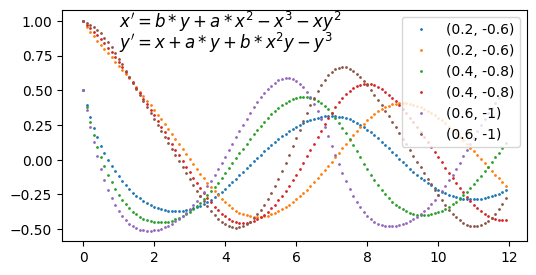

In [12]:
alpha = .05
dt = .1      ## 2,3,6,8;     1,2,7,9
t = np.arange(0,12,dt)
x0 = [.5, 1]
a = [(.2, -.6), (.4, -.8), (.6, -1)]
func = func3_
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=b*y + a*x^2 - x^3 - xy^2"
real1 = "y'=x + a*y + b*x^2y - y^3"
threshold_sindy=1e-2
threshold_similarity = 1e-2
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(1, .95, f'${real0}$', fontsize=12)
ax.text(1, .8, f'${real1}$', fontsize=12)

In [13]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = -0.306 1 + 0.206 x + -0.718 y + 7.442 x^2 + 0.561 xy + 3.529 y^2 + -2.205 x^3 + -2.592 x^2y + -3.137 xy^2 + -0.628 y^3 + -40.955 x^4 + -6.324 x^3y + -42.063 x^2y^2 + -3.243 xy^3 + -10.105 y^4 + -11.649 x^5 + 35.467 x^4y + 6.380 x^3y^2 + 35.559 x^2y^3 + 6.677 xy^4 + 7.917 y^5
(y)' = -0.142 1 + 1.095 x + 0.146 y + 3.364 x^2 + 0.264 xy + 1.640 y^2 + -0.550 x^3 + -1.813 x^2y + -0.989 xy^2 + -1.300 y^3 + -19.010 x^4 + -2.971 x^3y + -19.538 x^2y^2 + -1.527 xy^3 + -4.697 y^4 + -5.413 x^5 + 16.466 x^4y + 2.972 x^3y^2 + 16.535 x^2y^3 + 3.109 xy^4 + 3.690 y^5
(x)' = -0.079 1 + -0.035 x + -0.850 y + 1.352 x^2 + 0.281 xy + 0.624 y^2 + -0.744 x^3 + -0.077 x^2y + -0.966 xy^2 + -0.006 y^3 + -2.861 x^4 + -1.860 x^3y + -4.403 x^2y^2 + -1.328 xy^3 + -1.349 y^4 + -0.223 x^5 + 2.568 x^4y + 1.687 x^3y^2 + 3.353 x^2y^3 + 1.185 xy^4 + 0.855 y^5
(y)' = -0.040 1 + 0.987 x + 0.377 y + 0.502 x^2 + 0.155 xy + 0.323 y^2 + 0.108 x^3 + -0.868 x^2y 

In [14]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')

    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=b*y + a*x^2 - x^3 - xy^2
feature 0 with different basis ['y' 'x^2']: 
 [[-0.600 0.201 -1.000 -0.997]
 [-0.800 0.401 -1.000 -0.997]
 [-1.000 0.600 -1.000 -0.997]] 
 ['y' 'x^2' 'x^3' 'xy^2']
real1: y'=x + a*y + b*x^2y - y^3
feature 1 with different basis ['y' 'x^2y']: 
 [[1.000 0.200 -0.594 -0.999]
 [1.000 0.400 -0.795 -0.999]
 [1.000 0.600 -0.996 -0.999]] 
 ['x' 'y' 'x^2y' 'y^3']
trajectory 0 MSE loss: 2.9630303552920106e-07
trajectory 1 MSE loss: 2.6325473562501894e-07
trajectory 2 MSE loss: 2.828977618724636e-07
Mean of each trajecctory loss: 2.8081851100889453e-07
################### [GSINDy] threshold: 0.005 ################
**************************************************
real0: x'=b*y + a*x^2 - x^3 - xy^2
feature 0 with different basis ['y' 'x^2']: 
 [[-0.600 0.201 -1.000 -0.997]
 [-0.800 0.401 -1.000 -0.997]
 [-1.000 0.600 -1.000 -0.997]] 
 ['y' 'x^2' 'x^3

# 2 different variables: fun4_

Text(2, 3, "$y'=b*y + a*xy$")

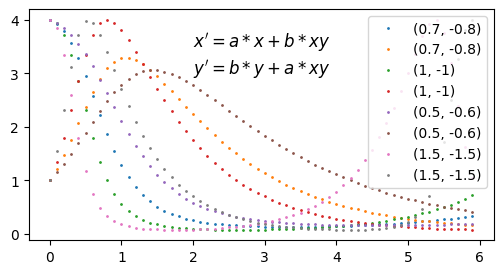

In [15]:

alpha = .05
dt = .1    ## 1,4    2,4
t = np.arange(0,6,dt)
x0 = [4, 1]
a = [(.7,-.8), (1,-1), (.5,-.6), (1.5,-1.5)]
func = func4_
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=a*x + b*xy"
real1 = "y'=b*y + a*xy"
threshold_sindy=1e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(2, 3.5, f'${real0}$', fontsize=12)
ax.text(2, 3, f'${real1}$', fontsize=12)

In [16]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = -6.165 1 + -105.566 x + -4.712 y + -40.864 x^2 + -2.881 y^2 + -41.769 x^3 + 2935.094 x^2y + -71.369 xy^2 + -0.767 y^3 + 3.780 x^4 + -629.010 x^3y + -699.901 x^2y^2 + -0.236 y^4 + -2.551 x^5 + 23.832 x^4y + 57.440 x^3y^2 + 26.975 x^2y^3 + -5.279 xy^4 + -0.046 y^5
(y)' = 7.817 1 + 5.671 x + 2.235 y + 15.543 x^2 + -181.006 xy + -2.370 y^2 + -9.504 x^3 + -177.036 x^2y + 177.610 xy^2 + -0.468 y^3 + 4.163 x^4 + 61.831 x^3y + -41.699 xy^3 + -0.290 y^4 + -0.410 x^5 + -4.603 x^4y + -2.819 x^3y^2 + 5.317 x^2y^3 + 3.813 xy^4 + -0.017 y^5
(x)' = 235.135 1 + 188.073 x + 163.650 y + 71.427 x^2 + -8600.219 xy + 53.803 y^2 + 17.746 x^3 + 1832.355 x^2y + 2694.189 xy^2 + 11.105 y^3 + 2.578 x^4 + -72.093 x^3y + -364.164 x^2y^2 + -285.180 xy^3 + 1.410 y^4 + 0.515 x^5 + 11.891 x^3y^2 + 24.486 x^2y^3 + 12.891 xy^4 + 0.164 y^5
(y)' = -36.769 1 + -23.979 x + -25.473 y + -7.706 x^2 + 1349.292 xy + -7.746 y^2 + 0.146 x^3 + -468.430 x^2y + -455

In [17]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=a*x + b*xy
feature 0 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'x^4' 'x^3y' 'x^2y^2'
 'xy^3' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4']: 
 [[-3.358 -12.648 -1.972 -11.848 58.888 -0.243 1.541 393.831 -52.269
  -2.083 -96.969 -85.301 9.282 0.000 5.051 8.788 2.276 -1.478]
 [-0.906 -5.684 -0.398 -4.533 28.035 -0.038 -2.968 204.988 -21.979 0.300
  -39.425 -34.789 4.268 -0.293 0.654 1.621 0.000 -0.604]
 [2.944 -0.951 1.983 5.219 -59.297 0.176 3.546 0.000 38.558 -2.005
  -18.910 -21.576 -8.613 0.421 3.612 6.812 4.864 1.101]
 [8.296 17.423 3.930 9.210 -299.301 0.617 3.774 -268.168 169.232 0.392
  74.873 7.609 -33.556 0.207 -3.387 0.000 6.369 3.223]] 
 ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'x^4' 'x^3y' 'x^2y^2'
 'xy^3' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4']
real1: y'=b*y + a*xy
feature 1 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2

# 1 variable: func1

Text(1, 4, "$y'=-y$")

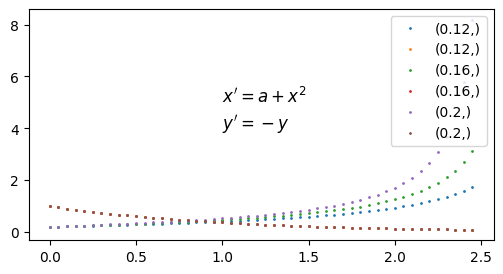

In [18]:

alpha = .05
dt = .05   ## 0,3
t = np.arange(0,2.5,dt)
x0 = [.2, 1]
a = [(.12,), (.16,), (.2,)]
func = func1
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=a + x^2"
real1 = "y'=-y"
threshold_sindy=5e-2
threshold_similarity = 1e-3
threshold_tol = 1e-2
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(1, 5, f'${real0}$', fontsize=12)
ax.text(1, 4, f'${real1}$', fontsize=12)

In [19]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = -1989.116 1 + -21073.258 x + -183358.543 y + -50444.347 x^2 + 1219836.552 xy + 12031.655 y^2 + -129766.635 x^3 + -3061331.450 x^2y + 219874.798 xy^2 + 57010.356 y^3 + 159860.336 x^4 + 6150598.308 x^3y + -125191.172 xy^3 + -5170.970 y^4 + -4.426 x^5 + -3284782.442 x^4y + -4147182.502 x^3y^2 + -106753.511 xy^4 + -1380.188 y^5
(y)' = 80.892 1 + 77.186 x + -10883.917 y + 166.189 x^2 + 29928.812 xy + 16552.443 y^2 + -2725.822 x^3 + -68666.413 x^2y + -22863.529 xy^2 + -18445.877 y^3 + 1039.248 x^4 + 88127.811 x^3y + 207578.658 x^2y^2 + 60365.748 xy^3 + 2708.137 y^4 + -0.026 x^5 + -21353.757 x^4y + -221511.048 x^3y^2 + -283450.863 x^2y^3 + 16151.327 xy^4 + 151.686 y^5
(x)' = 6882.122 1 + -204168.986 x + -7631963.522 y + -197791.550 x^2 + 20567630.193 xy + 13240056.178 y^2 + -2483882.011 x^3 + -40519336.439 x^2y + -24048432.874 xy^2 + -9612835.680 y^3 + 835950.079 x^4 + 63225380.698 x^3y + 130964116.095 x^2y^2 + 15843685.924 

In [20]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=a + x^2
feature 0 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']: 
 [[-1989.116 -21073.258 -183358.543 -50444.347 1219836.552 12031.655
  -129766.635 -3061331.451 219874.798 57010.356 159860.336 6150598.308
  0.000 -125191.172 -5170.970 -4.426 -3284782.442 -4147182.502 0.000
  -106753.511 -1380.188]
 [6882.278 -204168.649 -7631979.225 -197790.257 20567654.009 13240087.689
  -2483883.971 -40519390.374 -24048461.480 -9612871.156 835949.891
  63225420.864 130964389.511 15843764.636 1661133.114 -1.118
  -13311990.534 -164978995.963 -101079335.471 5508136.845 90508.829]
 [182042.937 -615693.039 -44569698.241 1483863.493 74638599.399
  96584753.112 -8988198.948 -150225434.440 -117887797.436 -85950580.661
  1540601.372 183738556.852 692490531.540 113914020.931 1

# 1 variable: func2

Text(0.1, 1.3, "$y'=-y$")

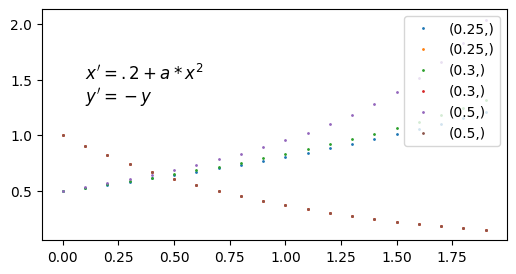

In [21]:
alpha = .05
dt = .1
t = np.arange(0,2,dt)
x0 = [.5, 1]
a = [(.25,), (.3,), (.5,)]
# a = [(.1,), (.25,), (.3,), (.5,)]
func = func2
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=.2 + a*x^2"
real1 = "y'=-y"
threshold_sindy=7e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(.1, 1.5, f'${real0}$', fontsize=12)
ax.text(.1, 1.3, f'${real1}$', fontsize=12)

In [22]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = 922078.848 1 + -1153296.287 x + -3309109.734 y + 780458.491 x^2 + 8868399.656 xy + -1184802.645 y^2 + -347645.253 x^3 + -15505071.579 x^2y + 11095548.839 xy^2 + -113509.010 y^3 + 105036.227 x^4 + 9596560.174 x^3y + -17407109.947 x^2y^2 + 1250335.250 xy^3 + 50911.206 y^4 + -8737.671 x^5 + -2464418.181 x^4y + 14925182.214 x^3y^2 + -4713262.623 x^2y^3 + -112240.526 xy^4 + -2723.172 y^5
(y)' = 272544.262 1 + -343126.767 x + -885247.143 y + 236973.041 x^2 + 2260022.512 xy + -237284.629 y^2 + -107702.645 x^3 + -4033891.787 x^2y + 2817964.765 xy^2 + -116023.231 y^3 + 31128.851 x^4 + 2431481.824 x^3y + -4473670.304 x^2y^2 + 480351.878 xy^3 + 16405.305 y^4 + -2741.643 x^5 + -596057.825 x^4y + 4075164.037 x^3y^2 + -1443104.731 x^2y^3 + 12124.310 xy^4 + -114.632 y^5
(x)' = 1123586.927 1 + 405830.899 x + 37958071.848 y + 982957.922 x^2 + -98988375.295 xy + -34621252.461 y^2 + -77490.243 x^3 + 112634979.565 x^2y + 63982054.299 xy^

In [23]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=.2 + a*x^2
feature 0 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']: 
 [[922462.222 -1153270.474 -3296146.240 780708.505 8832703.786
  -1195588.577 -347755.211 -15463805.441 11114928.230 -108059.390
  104978.755 9565685.497 -17446321.371 1240655.593 50581.495 -8739.677
  -2455695.612 14959088.823 -4694733.784 -113833.423 -2737.550]
 [289973.256 -45033.397 -1640344.293 80403.937 258615.952 1943268.974
  -93602.267 1663706.346 0.000 -2619797.169 -34243.530 -4937054.662
  2786139.777 5769108.260 179618.506 -699.120 2671023.522 1694052.697
  -9973118.711 919622.695 9140.036]
 [434718.702 176570.145 -18003493.179 40466.421 33438231.014 12930986.088
  -945025.626 -44459263.971 -1857056.300 -11979659.851 357460.818
  29804373.125 41515227.599 25902414.694 972302

# 1 variable: func3

Text(1, 0.7, "$y'=x + a*y - x^2y - y^3$")

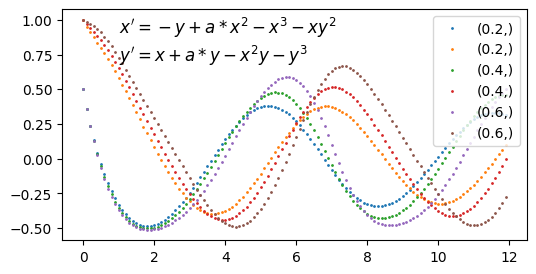

In [24]:

alpha = .05
dt = .1      ## 2,3,6,8;     1,2,7,9
t = np.arange(0,12,dt)
x0 = [.5, 1]
a = [(.2,), (.4,), (.6,)]
func = func3
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=-y + a*x^2 - x^3 - xy^2"
real1 = "y'=x + a*y - x^2y - y^3"    
threshold_sindy=1e-2
threshold_similarity = 1e-2
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(1, .9, f'${real0}$', fontsize=12)
ax.text(1, .7, f'${real1}$', fontsize=12)

In [25]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = -0.141 1 + -0.018 x + -0.898 y + 2.310 x^2 + 0.391 xy + 2.118 y^2 + -0.332 x^3 + -2.195 x^2y + -0.888 xy^2 + -2.032 y^3 + -7.609 x^4 + -2.638 x^3y + -15.757 x^2y^2 + -2.750 xy^3 + -7.783 y^4 + -4.439 x^5 + 9.319 x^4y + -3.822 x^3y^2 + 18.588 x^2y^3 + 0.205 xy^4 + 8.847 y^5
(y)' = -0.025 1 + 1.013 x + 0.193 y + 0.367 x^2 + 0.085 xy + 0.332 y^2 + -0.110 x^3 + -1.115 x^2y + -0.163 xy^2 + -1.098 y^3 + -1.284 x^4 + -0.594 x^3y + -2.443 x^2y^2 + -0.557 xy^3 + -1.081 y^4 + 0.960 x^4y + 0.565 x^3y^2 + 2.042 x^2y^3 + 0.654 xy^4 + 0.946 y^5
(x)' = -0.156 1 + -0.092 x + -1.101 y + 1.947 x^2 + 0.484 xy + 1.366 y^2 + -0.437 x^3 + -0.133 x^2y + -0.666 xy^2 + -0.037 y^3 + -3.852 x^4 + -2.720 x^3y + -7.795 x^2y^2 + -2.503 xy^3 + -3.245 y^4 + -0.563 x^5 + 3.722 x^4y + 1.932 x^3y^2 + 6.291 x^2y^3 + 1.905 xy^4 + 2.192 y^5
(y)' = 0.022 1 + 1.024 x + 0.406 y + -0.221 x^2 + -0.063 xy + -0.211 y^2 + -0.188 x^3 + -0.935 x^2y + -0.105 xy^2 + 

In [26]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=-y + a*x^2 - x^3 - xy^2
feature 0 with different basis ['x^2']: 
 [[-1.000 0.201 -1.000 -0.995]
 [-1.000 0.401 -1.000 -0.995]
 [-1.000 0.600 -1.000 -0.995]] 
 ['y' 'x^2' 'x^3' 'xy^2']
real1: y'=x + a*y - x^2y - y^3
feature 1 with different basis ['y']: 
 [[1.000 0.199 -0.992 -0.999]
 [1.000 0.399 -0.992 -0.999]
 [1.000 0.599 -0.992 -0.999]] 
 ['x' 'y' 'x^2y' 'y^3']
trajectory 0 MSE loss: 1.2496095414408259e-06
trajectory 1 MSE loss: 5.944888066582859e-07
trajectory 2 MSE loss: 3.593153002340801e-07
Mean of each trajecctory loss: 7.344712161110639e-07
################### [GSINDy] threshold: 0.005 ################
**************************************************
real0: x'=-y + a*x^2 - x^3 - xy^2
feature 0 with different basis ['x^2']: 
 [[-1.000 0.201 -1.000 -0.995]
 [-1.000 0.401 -1.000 -0.995]
 [-1.000 0.600 -1.000 -0.995]] 
 ['y' 'x^2' 'x^3' 'xy^2']
real1: y'=x

# 1 variable: func4

Text(2, 2.5, "$y'=-y + a*xy$")

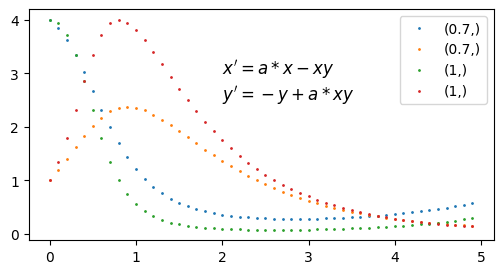

In [27]:

alpha = .05
dt = .1    ## 1,4    2,4
t = np.arange(0,5,dt)
x0 = [4, 1]
a = [(.7,), (1,)]#,(.5,),(.6,)]
func = func4
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=a*x - xy"
real1 = "y'=-y + a*xy"    
threshold_sindy=1e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(2, 3, f'${real0}$', fontsize=12)
ax.text(2, 2.5, f'${real1}$', fontsize=12)

In [28]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = -199.026 1 + -813.745 x + -91.599 y + -203.565 x^2 + 139.274 xy + 58.227 y^2 + -218.111 x^3 + 18589.383 x^2y + -2875.967 xy^2 + 4.442 y^3 + 17.966 x^4 + -3737.208 x^3y + -4409.460 x^2y^2 + 551.301 xy^3 + 5.809 y^4 + -11.722 x^5 + 119.165 x^4y + 288.662 x^3y^2 + 44.734 x^2y^3 + -138.679 xy^4 + -1.015 y^5
(y)' = 118.100 1 + 471.493 x + 63.658 y + 120.022 x^2 + -130.760 xy + -24.067 y^2 + 125.236 x^3 + -10771.302 x^2y + 1584.642 xy^2 + 0.643 y^3 + -10.054 x^4 + 2172.505 x^3y + 2594.438 x^2y^2 + -287.258 xy^3 + -2.725 y^4 + 6.739 x^5 + -70.056 x^4y + -172.173 x^3y^2 + -33.437 x^2y^3 + 77.053 xy^4 + 0.680 y^5
(x)' = -268.475 1 + -228.016 x + -177.722 y + -94.321 x^2 + 9809.383 xy + -55.044 y^2 + -27.355 x^3 + -1532.516 x^2y + -3416.446 xy^2 + -10.451 y^3 + -2.434 x^4 + 479.758 x^2y^2 + 423.107 xy^3 + -1.244 y^4 + -1.480 x^5 + -2.818 x^4y + -30.402 x^3y^2 + -52.169 x^2y^3 + -23.635 xy^4 + -0.112 y^5
(y)' = -2.729 1 + -3.311

In [29]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=a*x - xy
feature 0 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']: 
 [[-228.582 -487.679 -515.331 -199.820 2022.883 -353.097 -97.953 11407.446
  1534.914 -129.316 0.000 -2508.272 -4142.694 -934.993 -22.710 -5.769
  101.721 337.005 288.865 37.080 -4.706]
 [107.164 89.305 78.524 33.229 -3917.724 27.154 10.293 737.438 1088.959
  6.128 0.765 0.000 -76.336 -90.721 0.779 0.271 -3.088 -5.645 0.000 2.825
  0.118]] 
 ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']
real1: y'=-y + a*xy
feature 1 with different basis ['1' 'x' 'y' 'x^2' 'xy' 'y^2' 'x^3' 'x^2y' 'xy^2' 'y^3' 'x^4' 'x^3y'
 'x^2y^2' 'xy^3' 'y^4' 'x^5' 'x^4y' 'x^3y^2' 'x^2y^3' 'xy^4' 'y^5']: 
 [[118.100 471.493 63.658 

## Trigonometric basis

In [30]:
from pysindy.feature_library import FourierLibrary, CustomLibrary
from pysindy.feature_library import GeneralizedLibrary
from pysindy.optimizers import STLSQ

functions = [lambda x,y: 1, lambda x,y: x, lambda x,y: y, lambda x,y: np.sin(x), lambda x,y: np.sin(y), \
              lambda x,y: np.cos(x), lambda x,y: np.cos(y)]
names = [lambda x,y: '1', lambda x,y: 'x', lambda x,y: 'y', lambda x,y: 'sin(x)', lambda x,y: 'sin(y)', \
          lambda x,y: 'cos(x)', lambda x,y: 'cos(y)']
lib_custom = CustomLibrary(library_functions=functions, function_names=names)
lib_generalized = GeneralizedLibrary([lib_custom])


# 1 variable: func6

Text(0.1, 1, "$y'=a*y-5sin(x)$")

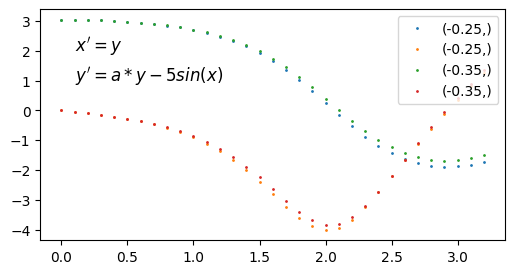

In [31]:

alpha = .05
dt = .1
t = np.arange(0,3.3,dt)
x0 = [np.pi-.1, 0]
a = [(-.25,), (-.35,)]
func = func6
monomial = monomial_trig
monomial_name = monomial_trig_name
real0 = "x'=y"
real1 = "y'=a*y-5sin(x)"
threshold_sindy=1e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(.1, 2, f'${real0}$', fontsize=12)
ax.text(.1, 1, f'${real1}$', fontsize=12)

In [32]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = 1.000 y
(y)' = 0.015 1 + 0.003 x + -0.242 y + -4.998 sin(x) + -0.007 sin(y) + 0.023 cos(x) + -0.001 cos(y)
(x)' = 0.001 1 + 1.001 y + -0.001 sin(y) + 0.002 cos(x)
(y)' = 0.012 1 + 0.004 x + -0.341 y + -4.997 sin(x) + -0.008 sin(y) + 0.026 cos(x)
################### [SINDy] threshold: 0.005 ################
(x)' = 1.000 y + -0.001 cos(x)
(y)' = 0.015 1 + 0.003 x + -0.242 y + -4.998 sin(x) + -0.007 sin(y) + 0.023 cos(x) + -0.001 cos(y)
(x)' = 0.001 1 + 1.001 y + -0.001 sin(y) + 0.002 cos(x)
(y)' = 0.005 1 + -0.347 y + -4.998 sin(x) + 0.004 cos(x) + -0.002 cos(y)
################### [SINDy] threshold: 0.01 ################
(x)' = 1.000 y
(y)' = 0.015 1 + 0.003 x + -0.242 y + -4.998 sin(x) + -0.007 sin(y) + 0.023 cos(x) + -0.001 cos(y)
(x)' = 0.001 1 + 1.000 y + 0.001 cos(x)
(y)' = 0.005 1 + -0.347 y + -4.998 sin(x) + 0.004 cos(x) + -0.002 cos(y)
################### [SINDy] threshold: 0.05 ################
(x)' = 1.000 y


In [33]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=y
feature 0 with different basis []: 
 [[1.000]
 [1.000]] 
 ['y']
real1: y'=a*y-5sin(x)
feature 1 with different basis ['y']: 
 [[-0.250 -5.000]
 [-0.350 -5.000]] 
 ['y' 'sin(x)']
trajectory 0 MSE loss: 3.569930797347732e-06
trajectory 1 MSE loss: 4.298063118367406e-06
Mean of each trajecctory loss: 3.933996957857569e-06
################### [GSINDy] threshold: 0.005 ################
**************************************************
real0: x'=y
feature 0 with different basis []: 
 [[1.000]
 [1.000]] 
 ['y']
real1: y'=a*y-5sin(x)
feature 1 with different basis ['y']: 
 [[-0.250 -5.000]
 [-0.350 -5.000]] 
 ['y' 'sin(x)']
trajectory 0 MSE loss: 3.569930797347732e-06
trajectory 1 MSE loss: 4.298063118367406e-06
Mean of each trajecctory loss: 3.933996957857569e-06
################### [GSINDy] threshold: 0.01 ################
********************************************

# 1 variable: func7

Text(0.1, 1.0, "$y'=-0.25*y+a*sin(x)$")

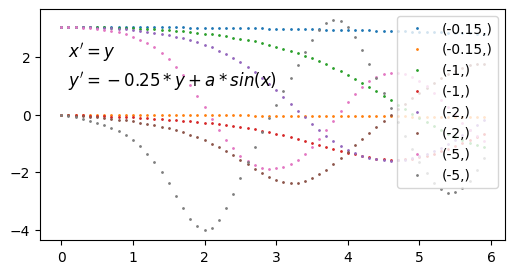

In [34]:

alpha = .05
dt = .1
t = np.arange(0,6,dt)
x0 = [np.pi-.1, 0]
# a = [-5, -6]
a = [(-.15,), (-1,), (-2,), (-5,)]
func = func7
monomial = monomial_trig
monomial_name = monomial_trig_name
real0 = "x'=y"
real1 = "y'=-0.25*y+a*sin(x)"
threshold_sindy=1e-2
threshold_similarity = 1e-3
threshold_tol = 1e-3
deriv_spline = True#False#


### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

fig, ax = plt.subplots(1,1,figsize=[6,3])
for i in range(num_traj):
    ax.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
ax.legend(loc='upper right')
ax.text(.1, 2, f'${real0}$', fontsize=12)
ax.text(.1, 1., f'${real1}$', fontsize=12)

In [35]:
#%% compare to pysindy
from utils import ode_solver

opts_params =  [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1]
for param in opts_params:
    optimizer = STLSQ(threshold=param, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
    
    print(f'################### [SINDy] threshold: {param} ################')
    for i in range(len(a)):
        # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
        sol_, t_ = ode_solver(func, x0, t, a[i])
        _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)
    
        model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
        model.print()
        # model.coefficients()
        
        # theta_ = monomial(sol_)
        # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

################### [SINDy] threshold: 0.001 ################
(x)' = 0.116 1 + -0.043 x + 3.037 y + -0.043 sin(x) + -2.037 sin(y) + 0.002 cos(x) + 0.023 cos(y)
(y)' = -0.112 1 + 0.039 x + -2.121 y + -0.111 sin(x) + 1.871 sin(y) + -0.001 cos(x) + -0.010 cos(y)
(x)' = 0.005 1 + -0.002 x + 0.995 y + -0.001 sin(x) + 0.005 sin(y) + -0.007 cos(x) + -0.006 cos(y)
(y)' = -0.010 1 + 0.004 x + -0.240 y + -0.998 sin(x) + -0.011 sin(y) + 0.014 cos(x) + 0.013 cos(y)
(x)' = 1.000 y
(y)' = 0.001 1 + -0.250 y + -2.000 sin(x) + 0.001 sin(y) + -0.002 cos(x) + -0.002 cos(y)
(x)' = 1.000 y
(y)' = -0.250 y + -4.999 sin(x) + -0.001 cos(x)
################### [SINDy] threshold: 0.005 ################
(x)' = 0.116 1 + -0.043 x + 3.037 y + -0.043 sin(x) + -2.037 sin(y) + 0.002 cos(x) + 0.023 cos(y)
(y)' = -0.087 sin(x)
(x)' = 0.005 1 + -0.002 x + 0.995 y + -0.001 sin(x) + 0.005 sin(y) + -0.007 cos(x) + -0.006 cos(y)
(y)' = -0.010 1 + 0.004 x + -0.240 y + -0.998 sin(x) + -0.011 sin(y) + 0.014 cos(x) + 0.013 cos

In [36]:
## group sindy
for param in opts_params:
    print(f'################### [GSINDy] threshold: {param} ################')
    gsindy = GSINDy(monomial=monomial,\
                    monomial_name=monomial_name, \
                    num_traj = num_traj, \
                    num_feature = num_feature, \
                    threshold_sindy=param, \
                    threshold_tol=threshold_tol, \
                    threshold_similarity=threshold_similarity, \
                    alpha=alpha,\
                    deriv_spline=deriv_spline)
        
    gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
    gsindy.basis_identification(remove_per=.2, plot_dist=False)
    
    Xi_final = gsindy.prediction(sol_org_list, t)
    
    
    all_basis = gsindy.all_basis
    diff_basis = gsindy.diff_basis
    np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
    print('*'*50)
    print(f'real0: {real0}')
    print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
    print(f'real1: {real1}')
    print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')
    
    loss = []
    for j in range(num_traj):
        sol0_deriv_prediction = gsindy.theta_org_list[0][j,:,:]@Xi_final[j,0,:]
        sol1_deriv_prediction = gsindy.theta_org_list[1][j,:,:]@Xi_final[j,1,:]
        
        sol0_deriv = gsindy.sol_deriv_org_list[0][j].squeeze()
        sol1_deriv = gsindy.sol_deriv_org_list[1][j].squeeze()
        
        loss_ = MSE(sol0_deriv_prediction, sol0_deriv) + MSE(sol1_deriv_prediction, sol1_deriv)
        loss.append(loss_)
        print(f'trajectory {j} MSE loss: {loss_}')
    print(f'Mean of each trajecctory loss: {np.mean(loss)}')

################### [GSINDy] threshold: 0.001 ################
**************************************************
real0: x'=y
feature 0 with different basis []: 
 [[1.000]
 [1.000]
 [1.000]
 [1.000]] 
 ['y']
real1: y'=-0.25*y+a*sin(x)
feature 1 with different basis ['sin(x)']: 
 [[-0.250 -0.150]
 [-0.250 -1.000]
 [-0.250 -2.000]
 [-0.250 -5.000]] 
 ['y' 'sin(x)']
trajectory 0 MSE loss: 8.847219119586675e-13
trajectory 1 MSE loss: 3.5803784925273822e-09
trajectory 2 MSE loss: 1.460554961734799e-07
trajectory 3 MSE loss: 1.3324625001274739e-06
Mean of each trajecctory loss: 3.705248148788483e-07
################### [GSINDy] threshold: 0.005 ################
**************************************************
real0: x'=y
feature 0 with different basis []: 
 [[1.000]
 [1.000]
 [1.000]
 [1.000]] 
 ['y']
real1: y'=-0.25*y+a*sin(x)
feature 1 with different basis ['sin(x)']: 
 [[-0.250 -0.150]
 [-0.250 -1.000]
 [-0.250 -2.000]
 [-0.250 -5.000]] 
 ['y' 'sin(x)']
trajectory 0 MSE loss: 8.84721911